# CopyAnyware
Copy ANY text on screen.<br>
Copy the text contained in the image with just one click.<br>
MAC Setting:<br>
- Screen Recording<br>
- Input Monitoring<br>
REQIRES:
- pyautogui
- No:Pillow
- pynput
    - MAYBE: pip install pynput --user
    - MAYBE: requires Input Monitoring for Anaconda
- matplotlib
- pyperclip<br>
- pytesseract
    - if using mac "brew install tesseract" 
        - if Warning: No available formula with the name "tesseract".
            https://stackoverflow.com/questions/68745875/cant-install-tesseract-on-mac-using-brew-install-tesseract<br>
TODO:
- take screenshot
- convert with ocr
- copy to clipboard
- improve UI
Py2app:
https://code-graffiti.com/create-native-mac-application-on-py2app-in-python/




All modifiers active!
702.2669067382812 497.6188049316406
702.2669067382812 497.6188049316406 142.72857666015625 69.32711791992188
start conv142,69
 

kListe【er
m` i<嚢〟【〟r

kb・L

    


All modifiers active!
282.700439453125 93.12455749511719
282.700439453125 93.12455749511719 81.2415771484375 35.9017333984375
start conv81,35
$齏"db醜


All modifiers active!
705.319091796875 258.23345947265625
705.319091796875 258.23345947265625 106.7454833984375 16.8758544921875
start conv106,16
G伽ー〟 ヵ レ ンダー




KeyboardInterrupt: 

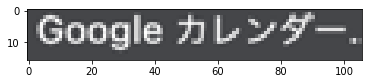

All modifiers active!
739.281982421875 574.071044921875
739.281982421875 574.071044921875 151.9083251953125 106.443359375
start conv151,106
・ c。py m cーipb曲rd
・ 冗爪pm)亀 UーPy2am
pyーh。n/

鵬rQ k_vh〟羹rd ・; kh


All modifiers active!
776.3794555664062 508.15338134765625
776.3794555664062 508.15338134765625 193.50732421875 79.88092041015625
start conv193,79
・ M^〉EE: pi賛 …sーaーー py"p】ー
・ MA〉BE. 陣q】ires ー叩】【 M〟
爪a(p】。驚ーib




In [5]:
from pynput import keyboard as kb
from pynput import mouse
import pyautogui as pag
#import matplotlib.pyplot as plt
import pyperclip
import pytesseract
#from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r'/Users/nekodigi/opt/anaconda3/bin/tesseract'



retina = True
lang = 'jpn'#eng jpn



COMBINATION = {kb.Key.alt}#ctrl + c to enable
# The currently active modifiers
current = set()
recording = False
startPos = 0, 0
prtsc = None
mouseX = 0
mouseY = 0

def on_press(key):
    if key == kb.Key.esc:
        kListener.stop()
        mListener.stop()
    c = ''
    try:
        c = key.char
    except:
        pass
    if key in COMBINATION:
        current.add(key)
    if all(k in current for k in COMBINATION):# and c == 'c'
        print('All modifiers active!')
        print(mouseX, mouseY)
        global startPos
        startPos = mouseX, mouseY
        global recording
        recording = True
    #print(key)
    
def on_release(key):
    try:
        current.remove(key)
        if not any(k in current for k in COMBINATION):
            copy()
            recording = False
    except KeyError:
        pass
    
def on_move(x,y):
    global mouseX,mouseY
    mouseX = x
    mouseY = y
    
#def on_click(x, y, button, pressed):
    
    #if recording:
        #if pressed:
            
        #if not pressed:#screenshot mouse position is not same due to retina?
   
def copy():
    global recording,startPos,prtsc
    sx = startPos[0]
    sy = startPos[1]
    bx,by,bw,bh = Pos2Box(sx, sy, mouseX, mouseY)
    print(bx, by, bw, bh)
    if bw > 10 and bh>10:
        if retina:
            prtsc = pag.screenshot(region=(bx*2, by*2, bw*2, bh*2))#require screen record permission
        else:
            prtsc = pag.screenshot(region=(bx, by, bw, bh))#require screen record permission
        div = 1
#         if bh > 100:
#             div = 2
#         if bh > 200:
#             div = 4
#         if bh > 400:
#             div = 8
        print(f"start conv{int(bw/div)},{int(bh/div)}")
        prtsc = prtsc.resize((int(bw/div), int(bh/div)))
        plt.imshow(prtsc)
        text = pytesseract.image_to_string(prtsc, lang=lang)#, 
        print(text)
        pyperclip.copy(text)
    #recording = False


def Pos2Box(x1, y1, x2, y2):#2 position to box(x,y,w,h)
    return min(x1, x2), min(y1, y2), abs(x1-x2), abs(y1-y2)
    
    
kListener = kb.Listener(on_press=on_press,on_release=on_release)
mListener = mouse.Listener(on_move=on_move)#on_click=on_click
kListener.start()#s, on_release=m_on_release
mListener.start()
kListener.join()
mListener.join()

^= 爬d】fiers ョ〔【i〉

 




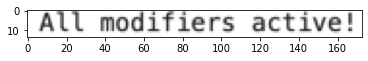

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/Users/nekodigi/opt/anaconda3/bin/tesseract'

plt.imshow(prtsc)
print(pytesseract.image_to_string(prtsc, lang='jpn'))

In [4]:
import os

for r,s,f in os.walk("/"):
    for i in f:
        if "tesseract" in i:
            print(os.path.join(r,i))

/usr/local/bin/tesseract
/usr/local/Homebrew/Library/Taps/homebrew/homebrew-core/Formula/tesseract-lang.rb
/usr/local/Homebrew/Library/Taps/homebrew/homebrew-core/Formula/tesseract.rb
/usr/local/lib/libtesseract.dylib
/usr/local/lib/libtesseract.a
/usr/local/lib/libtesseract.5.dylib
/usr/local/lib/pkgconfig/tesseract.pc
/usr/local/Cellar/tesseract/5.0.1/bin/tesseract
/usr/local/Cellar/tesseract/5.0.1/.brew/tesseract.rb
/usr/local/Cellar/tesseract/5.0.1/lib/libtesseract.dylib
/usr/local/Cellar/tesseract/5.0.1/lib/libtesseract.a
/usr/local/Cellar/tesseract/5.0.1/lib/libtesseract.5.dylib
/usr/local/Cellar/tesseract/5.0.1/lib/pkgconfig/tesseract.pc


KeyboardInterrupt: 